### Analysis of the Indian start-up ecosystem based on funding from 2018–2021

1.0 Business understanding 
    1.1 Analysis of the India Start_up ecosystem based on funding from 2018-2021

    1.1.2 Project Description 
    This project focuses on the funding received by start_ups in India from 2018-2021. Our objective is to analyse the data and help management make informed decision in terms of where to situate in India and possible funding we can attract


## Data for this project

Dataset for this project are four(4) csv files from 2018 to 2021. They were obtained from the following sources;

- 2020 & 2021 were obtained from Microsoft SQL server
      -- dbo.LP1_startup_funding2020
      -- dbo.LP1_startup_funding2021

- startup_funding2019 was downloaded from OneDrive

- startup_funding2018 was downloaded from GitHub Repository

2.0 ## 2. Data understanding
### This dataset contains funding information of the Indian startups from 2018 to August 2021.
### Column names and description:

- Company/Brand: Name of the company/start-up

- Founded: Year start-up was founded

- Sector: Sector of service

- What it does: Description about Company

- Founders: Founders of the Company

- Investor: Investors

- Amount($): Raised fund

- Stage: Round of funding reached

## Import Libraries and Packages

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#pip install seaborn



In [3]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install -upgrade pyodbc


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [6]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re


import datetime as dt
from sklearn.impute import SimpleImputer



import os

warnings.filterwarnings('ignore')

In [8]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [9]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [10]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query2020 = "select * from dbo.LP1_startup_funding2020"




df_2020 = pd.read_sql(query2020, connection)

In [11]:
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [12]:
query2021 = "select * from dbo.LP1_startup_funding2021"




df_2021 = pd.read_sql(query2021, connection)

In [13]:
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [14]:
#load the data 
df_2018 = pd.read_csv(r'E:\LP1\India-startup-ecosytem-analysis\startup_funding2018.csv')

## Exploratory Data Analysis (EDA)

In [15]:
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [16]:
df_2019 = pd.read_csv(r"E:\LP1\India-startup-ecosytem-analysis\startup_funding2019.csv")


In [17]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [18]:
df_2020.shape, df_2021.shape, df_2018.shape, df_2019.shape

((1055, 10), (1209, 9), (526, 6), (89, 9))

In [19]:
df_2020.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [20]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [21]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [22]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [23]:
df_2020.to_csv('startup_function2020.csv', index = False)

In [24]:
df_2021.to_csv('startup_function2021.csv', index = False)

2.1  Null hypothesis: The location os a business doesn't affeact the amount of funding received from investors.
Alternate hypothesis: The location of a business significantly affects the amount of funding issued by investors 
    2.1.1 To test this hypothesis we will examine the distribution of start_ups across cities and deduce which cities have the most highly funded start_ups 

2.2 Formulated question for our analysis
1.	To what extent do cities influence funding (amount, etc.)?
2.	Which sector are preferred by investors for funding?
3.	At which stage do start-ups get more funding from investors?
4.	What is the typical funding amount that startups receive in India?
5.	Which type of investors invest the most money?


3.0 Data Praparation 

In [25]:
#Cleaning 2018_data 
#load the data 
df_2018 = pd.read_csv(r'E:\LP1\India-startup-ecosytem-analysis\startup_funding2018.csv')

In [26]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [27]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [28]:
df_2018.isnull().sum() 

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [29]:
#checking the unique value of Round/series
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [30]:
df_2018[df_2018['Round/Series']=='https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

,Company Name,Industry,Round/Series,Amount,Location,About Company
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...


In [31]:
#dropping the row 164
df_2018=df_2018.drop(index=178)

In [32]:
#checking the unique value of Location
df_2018['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [33]:
#splitting the industry column using the comma
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [34]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...


In [35]:
#cheacking the unique value of amount
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [36]:
# changing the repuss currency into dollors currency using the exchange rates

for row in df_2018.index:

    for column in df_2018.columns:

        if '₹' in str(df_2018.loc[row, column]):

            amount = df_2018.loc[row, column].replace('₹', '').replace(',', '')

            df_2018.loc[row, column] = pd.to_numeric(amount, errors='coerce') * 0.146

        elif '$' in str(df_2018.loc[row, column]):

            df_2018.loc[row, column] = df_2018.loc[row, column].replace('$', '').replace(',', '')

        elif "—" in str(df_2018.loc[row, column]):

            df_2018.loc[row, column] = df_2018.loc[row, column].replace("—", '')

In [37]:
df_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,,Hyderabad,Eunimart is a one stop solution for merchants ...


In [38]:
df_2018['Amount'].unique()

array(['250000', 5840000.0, 9490000.0, '2000000', '', '1600000',
       2336000.0, 7300000.0, 14600000.0, '150000', '1100000', 73000.0,
       '6000000', '650000', 5110000.0, 9344000.0, 2920000.0, '1000000',
       '5000000', '4000000', 4380000.0, '2800000', '1700000', '1300000',
       730000.0, 1825000.0, 2190000.0, '500000', 15183999.999999998,
       6570000.0, '13400000', 3650000.0, 3854399.9999999995, 1168000.0,
       8760.0, '9000000', '100000', '20000', '120000', 4964000.0,
       49932000.0, '143145', 87600000.0, '742000000', 146000000.0,
       292000000.0, '3980000', '10000', 14599.999999999998, 36500000.0,
       '1000000000', '7000000', '35000000', 80300000.0, '28500000',
       35040000.0, 17520000.0, '2400000', '30000000', 365000000.0,
       '23000000', '11000000', 6424000.0, '3240000', 8760000.0,
       '540000000', 94900000.0, 233600000.0, '900000', '10000000',
       '1500000', 10220000.0, '14000000', 14964999.999999998, '100000000',
       175200.0, 759200000.0, '8

In [39]:
# replace commas and extract numbers to create a new column
df_2018['Amount'] = df_2018['Amount'].str.replace(',', '').str.extract(r'(\d+)').astype(float)


In [40]:
# # fill null values with the mode in the Amount($) column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_18 = imputer.fit(df_2018[['Amount']])
df_2018['Amount'] = imputer_18.transform(df_2018[['Amount']])

In [41]:
# confirm null value have been replaced
df_2018['Amount'].isnull().sum()

0

In [42]:
# Get the cardinality/number of unique values in each column
df_2018.nunique()

Company Name     524
Industry         405
Round/Series      20
Amount            98
Location          50
About Company    523
dtype: int64

In [43]:
df_2018['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [44]:

##mapping the industry colunm 
mapping_dict = {
    "Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing":"Media & Entertainment",
    "Agriculture, Farming" :"Agriculture",
    "Credit, Financial Services, Lending, Marketplace": "Finance",
    "Financial Services, FinTech":"Finance",
    "E-Commerce Platforms, Retail, SaaS":"E-commerce",
    "Cloud Infrastructure, PaaS, SaaS":"Technology",
    "Internet, Leisure, Marketplace', 'Market Research":"E-commerce",
    "Information Services, Information Technology', 'Mobile Payments" :"Technology",
    "B2B, Shoes, Internet":"Technology",
    "Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat": "Technology",
    "Food Delivery": "Transportation & Logistics", 
    "Industrial Automation":"Technology",
    "Automotive, Search Engine, Service Industry":"Engineering",
    "Finance, Internet, Travel" :"Technology",
    "Accounting, Business Information Systems, Business Travel, Finance, SaaS":"Technology",
    "Artificial Intelligence, Product Search, SaaS, Service Industry, Software" : "Technology",
    "Internet of Things, Waste Management": "Technology",
    "Air Transportation, Freight Service, Logistics, Marine Transportation":"Transportation & Logistics",
    "Financial Services":"Finance",
    "Food and Beverage": "Food & Beverage",
    "Autonomous Vehicles" : "Transportation & Logistics",
    "Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS": "Healthcare",
    "Agriculture, Analytics, Big Data, Farming":"Agriculture",
    "Logistics, Supply Chain Management" :"Transportation & Logistics",
    "Financial Services, Lending": "Finance",
    "Automotive, Marketplace, Online Portals":"Engineering",
    "Artificial Intelligence":"Technology",
    "Internet of Things, Telecommunications":"Technology",
    "Insurance": "Finance",
    "Information Technology, Logistics, Supply Chain Management":"Transportation & Logistics",
    "Blockchain, Developer Tools, Enterprise Software":"Technology",
    "Industrial Automation, Logistics, Supply Chain Management":"Transportation & Logistics",
    "Food and Beverage, Food Delivery, Snack Food', 'Education":"Food & Beverages",
    "E-Commerce, Fashion, Jewelry, Retail":"Retail",
    "Renewable Energy":"Energy",
    "E-Learning, Education":"Education",
    "Clean Energy, CleanTech, Laundry and Dry-cleaning":"Services",
    "E-Commerce, Fashion, Mobile":"E-commerce",
    "Apps, Messaging, Navigation, Public Safety":"Transportation & Logistics",
    "Transportation":"Transportation & Logistics",
    "Fitness, Health Care, Wellness": "Healthcare",
    "Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant":"Technology",
    "Hospitality":"Hospitality",
    "Food and Beverage, Tea":"Food & Beverage",
    "Media and Entertainment, News, Outdoors":"Media & Entertainment",
    "Broadcasting, Media and Entertainment, Music, Music Streaming, Video, Video Streaming":"Media & Entertainment",
    "B2B, Information Services, Information Technology":"Technology",
    "EdTech, Education, Enterprise Software, Peer to Peer":"Education",
    "Health Care, Medical":"Healthcare",
    "E-Commerce":"E-commerce",
    "Health Care, Hospital, Wellness":"Healthcare",
    "Sports":"Sports",
    "Big Data, Consumer Lending, FinTech":"Finance",
    "Cloud Computing, Computer, Semiconductor":"Technology",
    "Health Care, Medical, Pharmaceutical":"Healthcare",
    "Food Processing, Retail":"Food & Beverage",
    "Trading Platform":"E-commerce",
    "Consumer Goods, Lifestyle, Men's":"Lifestyle",
    "Wellness":"Lifestyle",
    "Food and Beverage, Food Processing, Nutrition":"Food & Beverage",
    "Fashion":"Lifestyle",
    "Automotive, Electric Vehicle, Energy Storage":"Engineering",
    "Consulting, Retail, Social":"Retail",
    "Biotechnology, Life Science, Pharmaceutical, Product Research":"Healthcare",
    "Health Care":"Healthcare",
    "Credit, Financial Services, FinTech, Personal Finance":"Finance",
    "Communities, Coworking, Incubators":"Services",
    "Consumer, Financial Services, FinTech":"Finance",
    "Consumer Applications, Information Services, Location Based Services, Virtual Assistant":"Technology",
    "Mobile, Mobile Apps, Personalization, Test and Measurement, Web Apps":"Technology",
    "Education, Financial Services, FinTech":"Finance",
    "Advertising, Consulting, Digital Marketing":"E-commerce",
    "Marketplace, Real Estate, Rental Property":"Real Estate",
    "E-Learning, Internet, Video Games":"Education",
    "Artificial Intelligence, Cloud Computing, Video":"Technology",
    "Health Care, Information Technology":"Healthcare",
    "Aerospace": "Engineering",
    "E-Commerce, Fashion, Lifestyle":"Lifestyle",
    "Artificial Intelligence, Business Intelligence, Industrial Automation, Machine Learning":"Technology",
    "Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Smart Home":"Real Estate",
    "EdTech, Education, Information Services, SaaS":"Education",
    "Energy, Solar":"Energy",
    "B2B, Biometrics, Cyber Security, Fraud Detection, SaaS, Security":"Technology",
    "Artificial Intelligence, Social":"Technology",
    "Logistics, Transportation, Travel":"Transportation & Logistics",
    "Digital Marketing, SEM, SEO, Web Development":"E-commerce",
    "Health Care, Hospital, Medical":"Healthcare",
    "Finance, Financial Services":"Finance",
    "Food Delivery, Food Processing, Internet":"Transportation & Logistics",
    "E-Commerce, Food and Beverage, Internet":"Food & Beverage",
    "Fitness, Food and Beverage, Health Care, Nutrition":"Food & Beverage",
    "EdTech, Education, Knowledge Management":"Education",
    "Apps, Beauty, Consumer, Retail":"Lifestyle",
    "Creative Agency, Crowdfunding, EdTech, Health Care, Internet, Medical, Non Profit, Personal Health":"Services",
    "Consumer Lending, Financial Services, FinTech, Insurance, Lending, Mobile Payments, Payments, Wealth Management":"Finance",
    "E-Learning, Education, Higher Education":"Education",
    "Health Diagnostics":"Healthcare",
    "EdTech, Education":"Education",
    "Financial Services, SaaS, Security":"Technology",
    "Banking, Finance, Financial Services, Non Profit":"Finance",
    "B2B, E-Commerce, Mobile":"Technology",
    "Automotive, Electric Vehicle, Renewable Energy":"Engineering", 
    "E-Learning":"Education",
    "Embedded Systems, Health Care, Medical, Product Research":"Healthcare",
    "Apps, E-Commerce, Internet":"E-commerce",
    "Advertising, Human Resources, Marketing":"E-commerce",
    "Beauty, Fitness, Home Services, Internet":"Lifestyle",
    "Health Care, Medical Device, Public Safety":"Healthcare",
    "Food Delivery, Online Portals, Restaurants":"Transportation & Logistics",
    "AgTech, B2B, Supply Chain Management":"Agriculture",
    "Credit Cards, Finance, Mobile Apps, Mobile Payments, Payments":"Finance",
    "Software":"Technology",
    "EdTech, Education, Higher Education, Secondary Education":"Education",
    "Manufacturing, Retail":"Retail",
    "Manufacturing":"Retail",
    "Information Services, Information Technology, InsurTech":"Finance",
    "Consumer Lending, FinTech":"Finance",
    "Internet, Social Network, TV":"Media & Entertainment",
    "Beauty, Health Care', 'Hospital":"Lifestyle",
    "Hospital":"Healthcare",
    "Events":"Hospitality",
    "3D Printing, Manufacturing, Product Design":"Manufacturing",
    "Automotive":"Engineering",
    "Automotive, Retail":"Retail",
    "Apps, Audio":"Media & Entertainment",
    "Automotive, E-Commerce":"Engineering",
    "Digital Entertainment, Fantasy Sports, Sports":"Media & Entertainment",
    "E-Learning, EdTech, Education":"Education",
    "Funding Platform, Incubators, Non Profit":"Services",
    "Hospitality, Hotel, Leisure, Travel":"Hospitality",
    "Classifieds, Internet, Marketplace, Rental Property":"Real Estate",
    "Banking, E-Learning, Trading Platform":"Education",
    "E-Commerce, Mobile, Retail":"Technology",
    "Artificial Intelligence, Information Technology":"Technology",
    "Enterprise Resource Planning (ERP), Information Services, Information Technology, Real Estate":"Real Estate",
    "Banking, Finance, Financial Services":"Finance",
    "Audio, Mobile, Tourism, Travel":"Transportation & Logistics",
    "Energy, Energy Storage, Infrastructure":"Energy",
    "Government, Information Technology, Software":"Technology",
    "Information Technology":"Technology",
    "Education, Information Technology, Internet, Mobile, Software":"Technology",
    "Consumer Lending, Financial Services, Lending, Personal Finance":"Finance",
    "Digital Media, Internet, Media and Entertainment, Online Portals, Social Media":"Media & Entertainment",
    "Business Intelligence, Customer Service, Market Research, SaaS":"Services",
    "Credit, Financial Services, FinTech, Lending":"Finance",
    "Children, Education, Parenting":"Education",
    "Automotive, Battery, Energy, Energy Storage":"Engineering",
    "E-Commerce, Mobile, Sharing Economy":"E-commerce",
    "Food Delivery, Organic, Organic Food":"Transportation & Logistics", 
    "Mobile":"Technology", 
    "Rental":"Real Estate",
    "Consumer":"Services", 
    "B2B, Farming, Marketplace":"E-commerce", 
    "Wealth Management":"Finance",
    "Biotechnology":"Healthcare", 
    "Education, Gaming, Training":"Education", 
    "Veterinary":"Healthcare",
    "Internet, Mobile, Social Entrepreneurship, Telecommunications, Wireless":"Technology",
    "Health Care, Hospital, Supply Chain Management":"Transportation & Logistics",
    "Tourism, Travel":"Transportation & Logistics", 
    "Hospitality, Real Estate":"Real Estate", 
    "Finance":"Finance",
    "Digital Media, EBooks, Publishing, Reading Apps":"Education",
    "Consumer Electronics, Embedded Systems, Hardware, Smart Building, Software":"Technology",
    "Food and Beverage, Food Processing":"Food & Beverage",
    "Internet, Marketplace, Shopping":"E-commerce",
    "Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition":"Technology",
    "Facilities Support Services":"Services",
    "Automotive, Electric Vehicle, Energy":"Engineering",
    "Health Care, Health Diagnostics, Predictive Analytics":"Healthcare",
    "Cloud Computing, Computer, SaaS, Software":"Technology",
    "Fashion, Lifestyle, Retail":"Lifestyle", 
    "Medical":"Healthcare", 
    "Music Streaming":"Media & Entertainment",
    "Finance, Impact Investing, Internet":"Finance",
    "Internet, Social Entrepreneurship":"Technology",
    "Retail":"Transportation & Logistics",
    "Finance, Impact Investing, Mobile Apps":"Technology",
    "Cloud Computing, Computer, Software":"Technology",
    "Business Development, Market Research, Outsourcing":"E-commerce",
    "Health Care, Hospitality":"Healthcare", 
    "Internet, Social News, Sports":"Media & Entertainment",
    "Human Resources":"Human Resources", 
    "Finance, Financial Services, FinTech":"Finance",
    "Customer Service, Software, Video, Video Streaming":"Technology",
    "E-Commerce, Food Processing":"E-commerce", 
    "Training":"Media & Entertainment", 
    "Travel":"Transportation & Logistics",
    "Dietary Supplements, Food and Beverage, Health Care, Organic Food, Snack Food":"Food & Beverage",
    "Manufacturing, Oil and Gas, Robotics":"Technology",
    "Artificial Intelligence, Computer, Machine Learning":"Technology",
    "Collaboration, Communities, Coworking, Sharing Economy":"Real Estate",   
    "Big Data, EdTech, Machine Learning":"Technology", 
    "Nanotechnology":"Technology",
    "Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media and Entertainment":"Media & Entertainment",
    "Financial Services, Lending, Peer to Peer":"Finance",
    "E-Commerce, Furniture, Home Decor, Interior Design, Internet":"Real Estate",
    "Digital Media":"Media & Entertainment", 
    "File Sharing, Personalization, Social Media":"Media & Entertainment",
    "Home Decor, Interior Design":"Real Estate",
    "Health Care, Medical Device, Mobile Apps":"Healthcare",
    "E-Commerce, Facilities Support Services, Procurement, Supply Chain Management":"E-commerce",
    "Crowdfunding, Finance, Financial Services":"Finance",
    "Finance, Financial Services, Insurance":"Finance",
    "Children, Education, Online Portals":"Education", 
    "Software, Virtual Reality":"Media & Entertainment",
    "B2B, Food and Beverage, Food Delivery":"Food & Beverage",
    "Catering, Food and Beverage, Food Delivery, Food Processing":"Food & Beverage",
    "Food and Beverage, Snack Food":"Food & Beverage", 
    "Automotive, E-Commerce, Mobile":"Engineering",
    "Computer, Digital Marketing, Facilities Support Services, Graphic Design, Internet, Mobile Apps, Social Media Marketing, Web Development":"Technology",
    "Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development":"Education",
    "Analytics, CRM, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, SaaS, Small and Medium Businesses":"E-commerce",
    "Delivery, Information Technology, Mobile Apps":"Technology",
    "Environmental Consulting, Renewable Energy":"Energy",
    "Big Data, Business Intelligence, Financial Services, FinTech, Personal Finance":"Finance",
    "Commercial Real Estate, Coworking, Office Administration, Real Estate":"Real Estate",
    "Food and Beverage, Food Processing, Organic Food, Snack Food":"Food & Beverage",
    "Apps, Health Care, Internet, Mobile Apps, Personal Health":"Healthcare",
    "Digital Media, Incubators, Social Entrepreneurship":"Services",
    "Finance, Financial Services, Marketing":"Finance",
    "Biotechnology, Health Care, Life Science, Medical Device":"Healthcare",
    "Education, Human Resources":"Education", 
    "Consumer Electronics":"Technology",
    "Apps, Health Care, Hospital, Mobile Apps":"Healthcare",
    "Delivery Service, Logistics, Service Industry":"Transportation & Logistics",
    "Big Data, Data Visualization, Logistics, Software":"Transportation & Logistics",
    "Basketball, Cricket, Cycling, eSports, Fitness, Golf, Health Care, Hockey, Sports, Swimming, Table Tennis, Volley Ball":"Sports",
    "Media and Entertainment, News, Publishing":"Media & Entertainment", 
    "Consulting":"Services",
    "Big Data, Financial Services, Machine Learning, Predictive Analytics":"Finance",
    "Agriculture, AgTech, Manufacturing":"Agriculture",
    "Digital Media, News, Publishing":"Media & Entertainment", 
    "Health Care, Hospital":"Healthcare",
    "B2B, E-Commerce, Enterprise":"E-commerce",
    "Fraud Detection, Information Services, Security":"Technology",
    "Agriculture, AgTech, Artificial Intelligence, Internet of Things, Machine Learning":"Agriculture",
    "Cryptocurrency, Trading Platform":"Technology",
    "Finance, FinTech, Mobile Payments":"Finance", 
    "Wedding":"Services",
    "E-Learning, EdTech, Education, Image Recognition, Machine Learning, STEM Education":"Education",
    "Consumer Goods":"E-commerce", 
    "Digital Entertainment":"Media & Entertainment",
    "Crowdsourcing, Financial Services, Funding Platform, Venture Capital":"Finance",
    "Delivery, Drones, Geospatial, Robotics":"Technology",
    "Health Care, Information Technology, Management Information Systems":"Healthcare",
    "Farming":"Agriculture",
    "Business Travel, Hospitality, Hotel, Marketplace, Tourism, Travel Accommodations":"E-commerce",
    "Career Planning, Education, Higher Education, Service Industry":"Education",
    "Medical Device":"Healthcare", 
    "Alternative Medicine, Health Care":"Healthcare",
    "Internet, Software":"Technology",
    "Dental, Elder Care, Health Care, Home Health Care, Personal Health":"Healthcare",
    "Financial Services, Insurance, Private Social Networking":"Finance",
    "Consumer Electronics, E-Commerce, E-Commerce Platforms, Electronics, Shipping, Shopping":"E-commerce",
    "CleanTech":"Services", 
    "Advertising, Internet, Marketing":"Media & Entertainment",
    "Human Resources, Security, Training":"Human Resources",
    "Consumer Lending, Finance, FinTech":"Finance",
    "Marketing, Social Media, Video":"Media & Entertainment", 
    "Banking":"Finance", 
    "Food Processing":"Agriculture",
    "Apps":"Technology", 
    "Marketing":"E-commerce",
    "Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation":"Transportation & Logistics",
    "Digital Entertainment, Fantasy Sports, Gaming, Sports":"Sports",
    "Automotive, Last Mile Transportation, Peer to Peer, Ride Sharing:":"Engineering",
    "Commercial, E-Learning, Education":"Technology",
    "Continuing Education, EdTech, Education, Skill Assessment":"Education",
    "Smart Cities, Telecommunications":"Real Estate", 
    "Internet of Things, Robotics":"Technology",
    "Apps, Home Services, Information Services, Information Technology":"E-commerce",
    "Medical, Tourism":"Transportation & Logistics", 
    "Career Planning, Education, Internet":"Education",
    "Fashion, Graphic Design, Wearables":"Real Estate",
    "Communities, Leisure, Mobile Apps, Software":"Lifestyle",
    "Automotive, Rental, Sharing Economy":"Engineering",
    "Energy, Environmental Consulting, Renewable Energy, Solar":"Energy",
    "Information Technology, SaaS, Security":"Technology",
    "Crowdfunding, Financial Services, Internet":"Finance",
    "Customer Service, Information Technology, Internet, Sales Automation":"Technology",
    "Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming":"Technology",
    "Credit Cards, Payments, Property Insurance, Property Management, Rental Property":"Real Estate",
    "Beauty, Cosmetics, Health Care, Service Industry":"Lifestyle",
    "EdTech, Education, Mobile, Tutoring":"Education", 
    "Social Media, Sports":"Sports",
    "Biopharma":"Healthcare", 
    "E-Commerce, E-Commerce Platforms, Retail":"E-commerce",
    "E-Commerce, Fashion, Shopping":"E-commerce",
    "Digital Entertainment, Mobile, PC Games":"Media & Entertainment",
    "Finance, Financial Services, Small and Medium Businesses":"Finance",
    "Artificial Intelligence, Energy, Oil and Gas":"Technology",
    "Computer, FinTech, Risk Management, Software":"Technology",
    "Apps, Financial Services, FinTech":"Finance",
    "Child Care, Health Care, Hospital, Medical, Women's":"Healthcare",
    "Agriculture, Mobile":"Agriculture",
    "Finance, FinTech, Payments, Property Development, Rental":"Real Estate",
    "Information Services, Information Technology, Mobile, Software":"Technology",
    "Apps, Fitness, Health Care, mHealth":"Lifestyle",
    "Food and Beverage, Food Delivery":"Food & Beverage", 
    "Apps, Payments, Retail":"E-commerce",
    "Health Insurance, Insurance, Life Insurance":"Finance",
    "Rental, Taxi Service, Travel":"Transportation & Logistics",#mistake
    "E-Commerce, E-Commerce Platforms, Internet, Retail":"E-commerce",
    "Financial Services, Professional Services":"Finance",
    "Customer Service, Messaging, Mobile Apps, Personalization":"Services",
    "Gaming, iOS, Sports":"Sports",
    "E-Commerce, E-Commerce Platforms, Internet, Mobile Apps, Social Media":"E-commerce",
    "Search Engine":"Technology",
    "Battery, Electric Vehicle, Energy, Renewable Energy, Transportation":"Engineering",
    "Agriculture, Farmers Market, Farming":"Agriculture",
    "Artificial Intelligence, Drones, Navigation, Packaging Services, Robotics":"Technology",
    "Fitness, GreenTech, Internet of Things, Mobile Apps, Ride Sharing, Transportation":"Lifestyle",
    "Mobile, Software, Travel":"Transportation & Logistics", 
    "Cosmetics":"Lifestyle",
    "Consulting, Cyber Security, Network Security":"Education",
    "eSports, Gaming, Video Games":"Sports", 
    "Fashion, Jewelry":"Lifestyle",
    "B2B, Medical Device":"Healthcare", 
    "Consumer Goods, Manufacturing":"Manufacturing",
    "Biotechnology, Health Care, Wellness":"Healthcare",
    "Health Care, Hospital, Medical, Robotics":"Healthcare",
    "E-Commerce, Fitness, Health Care":"Healthcare",
    "Financial Services, Venture Capital":"Finance", 
    "Accounting, Apps, FinTech":"Finance",
    "Apps, Mobile, Transportation":"Transportation & Logistics",
    "Reading Apps":"Education",
    "Energy, Renewable Energy, Solar":"Energy",
    "Banking, Financial Services, FinTech":"Finance", 
    "Apps, Education, Retail":"Education",
    "Electric Vehicle":"Engineering",
    "Automotive, Battery, Electric Vehicle, Manufacturing, Mechanical Design":"Engineering",
    "Automotive, E-Commerce, Marketplace":"E-commerce", 
    "Agriculture":"Agriculture",
    "Apps, Information Services, Information Technology":"Technology",
    "B2B, Marketplace":"E-commerce", 
    "Packaging Services":"Manufacturing",
    "Computer, Furniture, Software":"E-commerce",
    "Food Delivery, Hospitality, Reservations, Restaurants, Search Engine":"Hospitality",
    "Collaboration, Communities, Coworking, Real Estate":"Real Estate",
    "Accounting, Banking, Finance":"Finance",
    "Cloud Computing, Enterprise Software, Network Hardware, Network Security, SaaS":"Technology",
    "Information Services, Internet, Logistics, Supply Chain Management, Transportation":"Transportation & Logistics",
    "Automotive, E-Commerce, Information Services":"E-commerce",
    "Delivery, Logistics, Transportation":"Transportation & Logistics",
    "Automotive, E-Commerce Platforms, Marketplace":"E-commerce",
    "Last Mile Transportation, Railroad, Transportation, Travel":"Transportation & Logistics",
    "Cooking, E-Commerce, Food and Beverage, Food Delivery, Online Portals":"Food & Beverage",
    "FinTech, Mobile, Mobile Payments, Payments, Retail Technology":"E-commerce",
    "Online Games, Software":"Sports",
    "Online Portals, Property Management, Rental":"Real Estate",
    "E-Commerce, Food and Beverage, Tea":"Food & Beverage",
    "Music, Social Network, Video":"Media & Entertainment",
    "Health Care, Pharmaceutical, Wellness":"Healthcare",
    "Delivery Service, Food and Beverage, Food Delivery":"Food & Beverage",
    "Hospitality, Information Technology, Travel Accommodations":"Hospitality",
    "Biotechnology, Diabetes, Health Care":"Healthcare",
    "Autonomous Vehicles, Last Mile Transportation, Recreational Vehicles, Rental":"Transportation & Logistics",
    "Finance, Financial Exchanges, Financial Services, Micro Lending":"Finance",
    "Analytics, Apps, Market Research":"Technology",
    "E-Commerce, E-Commerce Platforms, Furniture, Home Decor, Internet":"E-commerce",
    "Apps, Mobile, Mobile Apps, Software":"Technology",
    "News, Publishing, Social Media":"Media & Entertainment",
    "Industrial, Industrial Automation":"Engineering",
    "Internet, Mobile Apps, Social Network":"Media & Entertainment",
    "Health Care, Health Diagnostics, Internet of Things, Life Science, Machine Learning, Medical, Medical Device":"Healthcare",
    "E-Commerce, Furniture, Interior Design":"E-commerce", 
    "Apps, Events, News":"Media & Entertainment",
    "Artificial Intelligence, Human Resources, Information Services, Information Technology":"Human Resources",
    "Logistics, Railroad, Transportation":"Transportation & Logistics",
    "Dating, Private Social Networking":"Lifestyle",
    "Artificial Intelligence, Machine Learning, PaaS":"Technology",
    "Consumer, Furniture, Home Decor, Home Improvement":"Real Estate",
    "Apps, E-Commerce, Internet, Mobile, Ride Sharing, Transportation":"Transportation & Logistics",
    "Health Care, Health Insurance":"Healthcare", 
    "Energy, Natural Resources":"Energy",
    "E-Commerce, Education, Health Care":"Education",
    "Apps, Health Care, Pharmaceutical":"Healthcare",
    "Internet, Knowledge Management":"Technology",
    "Credit, Finance, FinTech, Lending, Sales Automation":"Finance",
    "Banking, Financial Services, Internet":"Finance",
    "E-Commerce, Health Care, Retail":"E-commerce",
    "Child Care, Information Technology":"Technology",
    "Financial Services, Micro Lending":"Finance",
    "E-Commerce, Retail, Shopping":"E-commerce",
    "Food and Beverage, Snack Food, Tea":"Food & Beverage",
    "Delivery Service, E-Commerce, Logistics":"Transportation & Logistics",
    "Fashion, Lifestyle, Rental":"Lifestyle", 
    "Fantasy Sports, Mobile, Sports":"Sports",
    "Beauty, Fashion, Wellness":"Lifestyle", 
    "Food and Beverage, Restaurants, Tea":"Food & Beverage",
    "Fitness, Sporting Goods, Sports":"Manufacturing",
    "Food and Beverage, Food Processing, Manufacturing":"Food & Beverage",
    "E-Learning, Internet":"Education", 
    "Eyewear, Internet":"Technology",
    "Information Technology, Mobile, News, Operating Systems, Social Media, Social News":"Education",
    "FinTech, Internet, Payments, Service Industry":"Finance",
    "B2B, Business Development, Internet, Marketplace":"E-commerce",
    "Food and Beverage, Food Delivery, Internet":"Food & Beverage",
    "Biotechnology, Health Care, Pharmaceutical":"Healthcare",
    "Information Services, Information Technology":"Technology",
    "Mobile Payments":"Services",
    "Market Research":"Services",
    "Food and Beverage, Food Delivery, Snack Food ":"Food & Beverage",
    "B2B, Shoes ":"Manufacturing",
    "Internet, Leisure, Marketplace":"Lifestyle",
    "Beauty, Health Care":"Lifestyle",
    "Automotive, Last Mile Transportation, Peer to Peer, Ride Sharing":"Transportation & Logistics",
    "Food and Beverage, Food Delivery, Snack Food":"Food & Beverage",
    "B2B, Shoes":"E-commerce",
    "Internet":"Technology",
   
 
    





}

In [45]:
##mapping the dictionary made to create Sector with regax for the mapping to be done 
df_2018['Sector']= df_2018['Industry'].replace(mapping_dict,regex=False)

In [46]:
##droping the industry column
df_2018= df_2018.drop('Industry', axis=1)


In [47]:
# confirm null value 
df_2018['Sector'].isnull().sum()

0

In [48]:
#count the occurrences of unique values in Sector column
df_2018['Sector'].value_counts().sort_values(ascending=False)

Sector
Technology                    85
Finance                       74
Healthcare                    52
E-commerce                    40
Education                     40
Transportation & Logistics    38
                              30
Media & Entertainment         26
Food & Beverage               25
Lifestyle                     19
Engineering                   18
Real Estate                   17
Services                      16
Agriculture                   11
Sports                         9
Energy                         7
Retail                         5
Hospitality                    5
Manufacturing                  4
Human Resources                4
Name: count, dtype: int64

In [49]:
df_2018['Sector'].isnull().sum()

0

In [50]:
df_2018['Sector']= df_2018['Sector'].replace('',np.nan)

In [51]:
df_2018['Sector'].isnull().sum()

30

In [52]:
df_2018['Sector']= df_2018['Sector'].fillna(df_2018['Sector'].mode().iloc[0])

In [53]:
df_2018['Sector'].isnull().sum()

0

In [54]:
df_2018.Sector.unique()

array(['Media & Entertainment', 'Agriculture', 'Finance', 'E-commerce',
       'Technology', 'Lifestyle', 'Services',
       'Transportation & Logistics', 'Engineering', 'Food & Beverage',
       'Healthcare', 'Education', 'Retail', 'Energy', 'Hospitality',
       'Sports', 'Real Estate', 'Manufacturing', 'Human Resources'],
      dtype=object)

In [55]:
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [56]:
#changing of column name of Round/series
df_2018.rename(columns = { 'Round/Series':'Stage'}, inplace = True)

In [57]:
#Define a function for recategorization
#categorized the stage column
def recategorize(stage):
    if stage in ['Angel Round']:
        return 'Angel'
    elif stage in ['Seed','Funding Round']:
        return 'Seed'
    elif stage in ['Pre-seed','Non-equity Assistance']:
        return 'Pre-Seed'
    elif stage in ['Series A',]:
        return 'Series A'
    elif stage in ['Series B',]:
        return 'Series B'
    elif stage in ['Series E','Series D','Series H','Corporate Round','Post-IPO Equity']:
        return 'Later Stage'
    elif stage in ['Debt Financing','Post-IPO Debt']:
        return 'Debt Financing'
    elif stage in ['Private Equity','Secondary Market']:
        return 'Equity'
    elif stage in ['unknown','Undisclosed','Venture - Series Unknown']:
        return 'Unknown Stage'
    else:
        return stage
    
df_2018['Stage'] = df_2018['Stage'].apply(recategorize)

df_2018['Stage'].unique()
    


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C'], dtype=object)

In [58]:
##changing of column name 
df_2018.rename(columns = {'Company Name' :'Company/Brand', 'Sector' :'Sector', 'Stage':'Stage','Amount':'Amount($)','About Company':'What_it_does'}, inplace = True)

In [59]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  525 non-null    object 
 1   Stage          525 non-null    object 
 2   Amount($)      525 non-null    float64
 3   Location       525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Sector         525 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.9+ KB


In [60]:
# checking for duplicates
df_2018.duplicated().sum()

1

In [61]:
# lets have a look at rows with duplicates
df_2018.loc[df_2018.duplicated()]

,Company/Brand,Stage,Amount($),Location,What_it_does,Sector
348,TheCollegeFever,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Media & Entertainment


In [62]:
df_2018=df_2018.drop(index=348)

In [63]:
df_2018.to_csv('data_claning_2018.csv', index = False)

In [64]:
#loading 2019 data
df_2019 = pd.read_csv(r"E:\LP1\India-startup-ecosytem-analysis\startup_funding2019.csv")
df_2021.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [65]:
#Preview of dataset summary information using info method.

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [66]:
#View of number of rows and columns in 2019 dataset
num_f_colmns = df_2019.shape[(1)]
num_f_rows = df_2019.shape[(0)]

print('Number of rows in 2019 dataset:',num_f_rows)
print('Number of columns in 2019 dataset:',num_f_colmns)

Number of rows in 2019 dataset: 89
Number of columns in 2019 dataset: 9


In [67]:
# Preview of description summary of numerical columns using describe method

df_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [68]:
# Preview of description summary of categorical columns using describe method
df_2019.describe(include=object)

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


In [69]:
#Let us check for duplicates in our datas
duplicate_vals = df_2019.duplicated().sum()

#The 2019 dataset has no duplicate values

print("Count of duplicate values:",duplicate_vals)

Count of duplicate values: 0


In [70]:
#Check of number of missing values in our dataset.(i.e Total NAN values per column)
missin_vals = df_2019.isnull().sum()

#The 2019 dataset contains missing values

missin_vals

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [71]:
#conversion of missing value as percentage to enable comparison and inference
#we get total percentage of missing data in each column
#gives inference of whether to delete data or not

missing_percent = (df_2019.isnull().sum()/len(df_2019)) * 100

missing_percent

Company/Brand     0.000000
Founded          32.584270
HeadQuarter      21.348315
Sector            5.617978
What it does      0.000000
Founders          3.370787
Investor          0.000000
Amount($)         0.000000
Stage            51.685393
dtype: float64

In [72]:
#Boolean filtering of percentage missing data greater than 0 in columns
#only columns selected have missing percentage > 0

def missing_percent(table):
    missing_percent = (df_2019.isnull().sum()/len(df_2019)) * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    return missing_percent

In [73]:
# per_nan = percentage nan

per_nan = missing_percent(df_2019)

per_nan

Stage          51.685393
Founded        32.584270
HeadQuarter    21.348315
Sector          5.617978
Founders        3.370787
dtype: float64

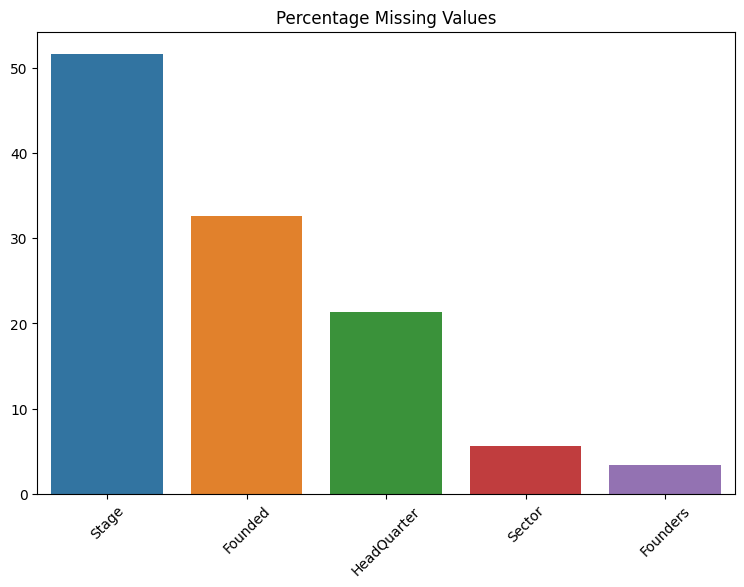

In [74]:
#Let us visualize to infer missing data for comprehensive understanding
#NBper_nan is a series data that is indexed(with only one column)
#NBseaborn and matplotlib are compatible, we'll us matplotlib's 'plt.xticks()' to do x-axis rotation 

plt.figure(figsize=(9, 6))
sns.barplot(x=per_nan.index, y=per_nan)
plt.xticks(rotation = 45)
plt.title("Percentage Missing Values");
#plt.ylim(3, 21)
#to get columns with missing data btwn 3 to 21 percentage, we use function 'plt.ylim()'

In [75]:
#let us clean column named 'founded' 
#we will fill in missing values with the median value
elements = df_2019["Founded"].unique()
elements

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [76]:
#Count of missing values in column 'founded'

missn_vals = df_2019["Founded"].isna().sum()
missn_vals 
print("Count of missing values in Founded column:",missn_vals)

Count of missing values in Founded column: 29


In [77]:
#Convert the column to numeric, coercing non-numeric values to NaN:
#pd.to_numeric() converts values to float

df_2019["Founded"] = pd.to_numeric(df_2019["Founded"], errors='coerce')

#Calculate the median of the column, ignoring the NaN values:
median_value = df_2019["Founded"].median(skipna=True)

median_value

2015.0

In [78]:
#Replace the NaN values with the calculated median:
df_2019["Founded"].fillna(median_value, inplace=True)

In [79]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
df_2019["Founded"].isna().values.any()

False

In [80]:
#we will clean column 'Headquarter'
#We will fill up missing values with the mode(most occuring instance)

#Let us use unique() method to examine the unique values:
df_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [81]:
#Check on data
df_2019['HeadQuarter']

0           NaN
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: object

In [82]:
#Calculate the mode of the column:
#The iloc indexer is used to retrieve the first value from the mode result.
#The mode() function returns a pandas Series object that contains the mode(s) of the column.

mode_value = df_2019["HeadQuarter"].mode().iloc[0]

mode_value

'Bangalore'

In [83]:
#Replace the missing values with the mode:
df_2019["HeadQuarter"].fillna(mode_value, inplace=True)

In [84]:
#Any missing values?
#Let us confirm whether there are any NAN values after changes
df_2019["HeadQuarter"].isna().values.any()

False

In [85]:
df_cleaned = df_2019

In [86]:
# Replace missing values with "Unknown" in the 'Founders' column
df_cleaned['Founders'] = df_cleaned['Founders'].fillna("Unknown")

#Any missing values?
#Let us confirm whether there are any NAN values after changes

df_cleaned["Founders"].isna().values.any()

False

In [87]:
#Let us clean 'stage' colum
#Column has inconsistencies

df_cleaned['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [88]:
#Count of missing values in column 'Stage'

missn_vals = df_cleaned["Stage"].isna().sum()
missn_vals 

print("Count of missing values in stage column:",missn_vals)

Count of missing values in stage column: 46


In [89]:
#Replace the NaN values with 'Unknown':
df_cleaned["Stage"].fillna("Unknown", inplace=True)

In [90]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
df_cleaned["Stage"].isna().values.any()

False

In [91]:
#A look at categorical column 'stage' value distribution.

df_cleaned["Stage"].value_counts()

Stage
Unknown          46
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [92]:
#Renaming category variables for consistency
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Pre-series A":"Pre series A"})
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Seed fund":"Seed"})
df_cleaned["Stage"] = df_cleaned["Stage"].replace({"Seed funding":"Seed"})

df_cleaned["Stage"].value_counts()

Stage
Unknown          46
Series A         10
Pre series A      9
Series B          8
Series D          4
Series C          3
Seed              2
Fresh funding     1
Series G          1
Post series A     1
Series E          1
Series F          1
Series B+         1
Seed round        1
Name: count, dtype: int64

In [93]:
def Stage_recategorization(Stage):
# use of word boundaries (\b) to avoid partial word matches. This ensures that only whole words are matched.
    
    if re.search(r'\b(Pre series A|Pre-series A)\b', Stage):
        return 'Pre-series A'   
     
    elif re.search(r'\b(Series B|Series B+)\b', Stage):
        return 'Series B' 
    
    elif re.search(r'\b(Seed round|Seed fund|Seed round|Fresh funding)\b', Stage):
        return 'Seed'
    
    elif re.search(r'\b(Series D|Series E|Series F|Series G|Post series A)\b', Stage):
        return 'Later Stage'
    
    elif re.search(r'\b(Unknown)\b', Stage):
        return 'Unknown Stage'
    
    else:
        return Stage

In [94]:
#Make Changes to stage using the created function
df_cleaned["Stage"] = df_cleaned["Stage"].apply(Stage_recategorization)

In [95]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
df_cleaned["Stage"].isna().values.any()

False

In [96]:
#A look at categorical column 'stage' value distribution.

df_cleaned["Stage"].value_counts()

Stage
Unknown Stage    46
Series A         10
Pre-series A      9
Series B          9
Later Stage       8
Seed              4
Series C          3
Name: count, dtype: int64

In [97]:
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [98]:
df_2019['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

In [99]:
df_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Unknown Stage
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Seed
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Later Stage
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Unknown Stage


In [100]:


#Handing inconsistencies in 'Amount' column

# Remove dollar sign, and convert the "amount" column from integer to float

df_2019['Amount($)'] = df_2019['Amount($)'].str.replace('[$,]', '', regex=True)
#Replace "undisclosed" with NaN

df_2019['Amount($)'] = df_2019['Amount($)'].replace('Undisclosed', np.nan)




#Preview of modified 'Amount' column




df_2019['Amount($)'].head()





0      6300000
1    150000000
2     28000000
3     30000000
4      6000000
Name: Amount($), dtype: object

In [101]:
#changing object into float 
df_2019['Amount($)'].astype('float64')

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [102]:
#count of null value in the Amount column 
df_2019['Amount($)'].isnull().sum()

12

In [103]:
#Convert the column to numeric, coercing non-numeric values to NaN:

#pd.to_numeric() converts values to float




df_2019["Amount($)"] = pd.to_numeric(df_2019["Amount($)"], errors='coerce')




#Calculate the median of the column, ignoring the NaN values:

median_value = df_2019["Amount($)"].median(skipna=True)




median_value

6000000.0

In [104]:
#let us confirm count of Non-NA elements in column the 'amount'

#DataFrame.count() method returns count of non-Non-NA/null entries




Non_NA = df_2019["Amount($)"].count()




print("Count of non-NA elements in Amount column:",Non_NA)

Count of non-NA elements in Amount column: 77


In [105]:
#Replace the NaN values with the calculated median:

df_2019["Amount($)"].fillna(median_value, inplace=True)

In [106]:
#confirm whether there are any NAN values (missing_values)

df_2019["Amount($)"].isna().values.any()

False

In [107]:
df_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Unknown Stage
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Seed


## Sector Column
#### Column has inconsistencies and some elements need to be renamed to have consistent names
##### We will create a function that groups similar sub-sectors into one sector
***use of unique() method to examine the unique values***

In [108]:
print(df_2019["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' nan 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [109]:
df_2019['Sector'].isnull().sum()

5

In [110]:
df_2019['Sector'] = df_2019['Sector'].fillna(df_2019['Sector'].mode()[0])

In [111]:
#Check of counts of each category in the column
df_2019["Sector"].value_counts().sort_values(ascending=False)

Sector
Edtech                          12
Fintech                          5
AgriTech                         4
Technology                       4
SaaS                             4
Automobile                       3
E-commerce                       3
Logistics                        3
IoT                              2
E-marketplace                    2
AI                               2
Automotive tech                  2
Accomodation                     2
Foodtech                         2
Food                             2
Pharmaceutical                   1
Interior design                  1
AI & Tech                        1
E-commerce & AR                  1
HR tech                          1
Food tech                        1
Health                           1
Healthcare                       1
E-Sports                         1
B2B                              1
Insurance technology             1
Robotics & AI                    1
Travel                           1
Manufacturing

In [112]:
print(df_2019["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [113]:
def sector_redistribution(Sector):

    Sector = Sector.lower()  # Convert sector to lowercase for case-insensitive matching
    
    if re.search(r'\b(virtual banking|fintech|banking|mutual funds|insurance technology)\b', Sector):
        return 'Finance'   
     # use of word boundaries (\b) to avoid partial word matches. This ensures that only whole words are matched.
    
    elif re.search(r'\b(ecommerce|e-commerce|e-commerce & ar|e-marketplace|b2b|b2b supply chain)\b', Sector):
        return 'E-commerce' 
    
    elif re.search(r'\b(edtech)\b', Sector):
        return 'Education'
    
    elif re.search(r'\b(agritech)\b', Sector):
        return 'Agriculture'

    elif re.search(r'\b(technology|saas|ai & tech|safety tech|ai|iot|robotics & ai|legal tech|infratech|cybersecurity|social media)\b', Sector):
        return 'Technology'
    
    elif re.search(r'\b(interior design|jewellery|cosmetics|yoga & wellness)\b', Sector):
        return 'Lifestyle'
    
    elif re.search(r'\b(hr tech)\b', Sector):
        return 'Human Resources'
    
    elif re.search(r'\b(foodtech|food & tech|food|food & nutrition)\b', Sector):
        return 'Food & Beverage'
    
    elif re.search(r'\b(health|healthcare|healthtech|pharmaceutical)\b', Sector):
        return 'Health'
    
    elif re.search(r'\b(marketing & customer loyalty)\b', Sector):
        return 'Marketing and Advertising'
    
    elif re.search(r'\b(manufacturing)\b', Sector):
        return 'Manufacturing'
    
    elif re.search(r'\b(logistics|automotive tech|automobile|automobile & technology|transportation|transport & rentals)\b', Sector):
        return 'Transportation & Logistics'
    
    elif re.search(r'\b(travel|accomodation|hospitality)\b', Sector):
        return 'Hospitality'
    
    elif re.search(r'\b(e-sports|games|sports)\b', Sector): 
        return 'Sports'
    
    else:
        return Sector


In [114]:
df_2019["Sector"] = df_2019["Sector"].apply(sector_redistribution)

In [115]:
df_2019.to_csv('startup_funding2019(Clean_Data).csv', index = False)

In [116]:
#loading 2020 data
df_2020= pd.read_csv('startup_function2020.csv')
df_2020.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN


In [117]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [118]:
# drop 'column10' from the dataset
df_2020=df_2020.drop('column10', axis=1)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [119]:
df_2020['Founded'].describe()

count     842.000000
mean     2015.363420
std         4.097909
min      1973.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: Founded, dtype: float64

In [120]:
imputer=SimpleImputer(strategy='median')

In [121]:
imputer.fit_transform(df_2020[['Founded']])

array([[2019.],
       [2019.],
       [2018.],
       ...,
       [2012.],
       [2015.],
       [2017.]])

In [122]:
median_value=df_2020['Founded'].median()
df_2020['Founded'].fillna(median_value, inplace=True)
df_2020.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           254
Stage            464
dtype: int64

In [123]:
# convert 'Founded' data type from float to integer
#check to confirm data type

df_2020['Founded']=df_2020['Founded'].astype(int)

column_dtype=df_2020['Founded'].dtype
print(column_dtype)

int32


In [124]:
#check unique characters in 'Founded'
df_2020['Founded'].unique()

array([2019, 2018, 2020, 2016, 2008, 2015, 2017, 2014, 1998, 2007, 2011,
       1982, 2013, 2009, 2012, 1995, 2010, 2006, 1978, 1999, 1994, 2005,
       1973, 2002, 2004, 2001])

In [125]:
#check unique characters in 'HeadQuarter'
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [126]:
unique_chars_count=df_2020['HeadQuarter'].nunique()
unique_chars_count

77

In [127]:
#maintain first word before comma in the HeadQuarter column
df_2020["HeadQuarter"]=df_2020['HeadQuarter'].apply(str)
df_2020['HeadQuarter']=df_2020['HeadQuarter'].str.split(',').str[0]
df_2020['HeadQuarter']=df_2020['HeadQuarter'].replace("'","",regex=True)

In [128]:
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'nan', 'Singapore',
       'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Delhi',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Trivandrum', 'Cochin', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Rajastan', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Bengaluru'], dtype=object)

In [129]:
unique_chars_count=df_2020['HeadQuarter'].nunique()
unique_chars_count

72

In [130]:
#rename similar cities and country names
#replace specific values in column 'HeadQuarter'

df_2020['HeadQuarter']=df_2020['HeadQuarter'].replace({'Bengaluru':'Bangalore', 'San Francisco Bay Area':'San Francisco','Banglore':'Bangalore','San Franciscao':'San Francisco','Newcastle Upon Tyne':'Newcastle'})
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'nan', 'Singapore',
       'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Delhi',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Trivandrum', 'Cochin', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle', 'Shanghai', 'Jiaxing', 'Rajastan', 'Kochi',
       'Ludhiana', 'Dehradun', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh', 'Warangal',
       'Hyderebad', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal', 'Coimbatore'], dtype=object)

In [131]:
#Fill in missing data with mode
mode_HeadQuarter=df_2020['HeadQuarter'].mode()
df_2020['HeadQuarter'].fillna(mode_HeadQuarter, inplace=True)
df_2020['HeadQuarter'].isnull().sum()

0

In [132]:
df_2020['HeadQuarter']=df_2020['HeadQuarter'].replace({'Coimbatore':'Tamil Nadu', 'Hyderebad':'Hyderabad','Ludhiana':'Punjabi','Rajastan':'Rajasthan','Irvine':'California','Samastipur':'Bihar','Bangaldesh':'Bangladesh','Plano':'Texas','San Ramon':'California','San Francisco':'California'})
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'nan', 'Singapore',
       'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Delhi',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna', 'Paris',
       'Texas', 'Sydney', 'Bangladesh', 'London', 'Milano', 'Palmwoods',
       'France', 'Trivandrum', 'Cochin', 'Bihar', 'Tumkur', 'Newcastle',
       'Shanghai', 'Jiaxing', 'Rajasthan', 'Kochi', 'Punjabi', 'Dehradun',
       'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Odisha', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal'], dtype=object)

In [133]:
unique_chars_count=df_2020['HeadQuarter'].nunique()
unique_chars_count

62

###Clean Stage column

In [134]:
df_2020['Stage'].head()

0         NaN
1    Pre-seed
2    Pre-seed
3         NaN
4         NaN
Name: Stage, dtype: object

In [135]:
#fill empty data in stage with unknown
df_2020['Stage'].fillna('unknown', inplace=True)
df_2020['Stage'].isnull().sum()

0

In [136]:
#Define a function for recategorization
def recategorize(stage):
    if stage in ['Angel Round','Pre seed Round','Pre-seed Round','Pre seed round']:
        return 'Angel'
    elif stage in ['Seed','Seed funding','Seed Investment','Seed Round','Seed Round & Series A','Seed round','Seed Funding','Seed A']:
        return 'Seed'
    elif stage in ['Pre-seed','Pre-Seed','Pre series A1','Pre series A']:
        return 'Pre-Seed'
    elif stage in ['Pre-series A','Pre-series','Bridge','Pre Series A','Bridge Round','Pre- series A']:
        return 'Pre-Series'
    elif stage in ['Series A','Pre-series B','Pre-Series B','Series A-1','Pre series B']:
        return 'Series A'
    elif stage in ['Series B','Pre-series C','Series B2','Pre series C','Mid series']:
        return 'Series B'
    elif stage in ['Series E','Series D','Series F','Edge','Series H','Series E2','Series D1','Series C, D']:
        return 'Later Stage'
    elif stage in ['Debt']:
        return 'Debt Financing'
    elif stage in ['unknown']:
        return 'Unknown Stage'
    else:
        return stage
    
df_2020['Stage'] = df_2020['Stage'].apply(recategorize)

df_2020['Stage'].unique()

array(['Unknown Stage', 'Pre-Seed', 'Seed', 'Pre-Series', 'Series C',
       'Series A', 'Series B', 'Debt Financing', 'Later Stage', 'Angel'],
      dtype=object)

In [137]:
df_2020['Stage'].nunique()

10

In [138]:
df_2020['Stage'].unique()

array(['Unknown Stage', 'Pre-Seed', 'Seed', 'Pre-Series', 'Series C',
       'Series A', 'Series B', 'Debt Financing', 'Later Stage', 'Angel'],
      dtype=object)

In [139]:
#Fill missing data in 'Founders' column with 'unknown'
df_2020['Founders'].fillna('unknown', inplace=True)
df_2020['Founders'].isnull().sum()

0

In [140]:
df_2020['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [141]:
df_2020['Investor'].fillna('unknown', inplace=True)
df_2020['Investor'].isnull().sum()

0

In [142]:
#Fill in missing data with median
median_Amount=df_2020['Amount'].median()
df_2020['Amount'].fillna(median_Amount, inplace=True)
df_2020['Amount'].isnull().sum()

0

In [143]:
df_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [144]:
df_2020['Sector']=df_2020['Sector'].str.lower()
df_2020['Sector']

0                 agritech
1                   edtech
2       hygiene management
3                   escrow
4                 agritech
               ...        
1050                edtech
1051               fintech
1052             cosmetics
1053             transport
1054              logitech
Name: Sector, Length: 1055, dtype: object

In [145]:
df_2020['Sector'].value_counts().head(20)

Sector
fintech          131
edtech           107
healthtech        42
agritech          38
e-commerce        33
saas              24
ecommerce         22
media             19
tech              19
ai                18
gaming            16
logistics         16
saas startup      15
foodtech          15
healthcare        14
tech startup      14
ai startup        13
entertainment     12
food              12
tech company      10
Name: count, dtype: int64

In [146]:

mode_Sector=df_2020['Sector'].mode()[0]
df_2020['Sector'].fillna(mode_Sector, inplace=True)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        1055 non-null   int32  
 2   HeadQuarter    1055 non-null   object 
 3   Sector         1055 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1055 non-null   object 
 6   Investor       1055 non-null   object 
 7   Amount         1055 non-null   float64
 8   Stage          1055 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 70.2+ KB


In [147]:
value_counts = df_2020['Sector'].value_counts(ascending=False)
#print(value_counts)

# Set max_rows to None for displaying all rows
pd.set_option('display.max_rows', None)

# Display the value counts in descending order
print(value_counts.to_string())

Sector
fintech                               144
edtech                                107
healthtech                             42
agritech                               38
e-commerce                             33
saas                                   24
ecommerce                              22
media                                  19
tech                                   19
ai                                     18
gaming                                 16
logistics                              16
saas startup                           15
foodtech                               15
healthcare                             14
tech startup                           14
ai startup                             13
entertainment                          12
food                                   12
tech company                           10
iot                                     8
cosmetics                               7
automobile                              7
fashion                    

In [148]:
df_2020["Sector"].nunique()

285

In [149]:
#Define a function for recategorization
def recategorize(sector):
    if sector in ['fintech','escrow','venture capitalist','finance company','finance','insurtech','investment',
                  'taxation','venture capital','insurance tech','insuretech','online financial service','insurance technology',
                  'investment tech','financial services','insurance','neo-banking']:
        return 'Finance'
    elif sector in ['edtech','edtech startup','education','edttech','saas/edtech','preschool daycare']:
        return 'Education'
    elif sector in ['healthtech','healthcare','medtech','hygiene management','cleantech','fertility tech','nutrition sector',
                    'health & wellness','health','yoga & wellness','pharmaceutical','nutrition','nutrition tech',
                    'eye wear','healthcare/edtech','ai health','mental health','heathtech','ayurveda tech','sanitation solutions',
                    'eyeglasses','startup laboratory','med tech','pharma','health and fitness','hygiene','pharmacy']:
        return 'Health'
    elif sector in ['agritech','dairy startup','dairy','b2b agritech','agritech/commerce','agritech startup','agritech startup',
                    'agri tech','soil-tech','agriculture','supply chain, agritech','biopharma']:
        return 'Agriculture'
    elif sector in ['e-commerce','ecommerce','crowdsourcing','social e-commerce','social commerce','e-market','b2b marketplace',
                    'bike marketplace','content marketplace','online credit management startup','e store','content marktplace',
                    'estore']:
        return 'E-commerce'
    elif sector in ['saas','tech','ai','gaming','saas startup','tech startup','ai startup','tech company',
                    'iot','networking platform','virtual auditing startup','telecommunication','cloud company',
                    'software company','iot startup','video sharing platform','gaming startup','video streaming platform',
                    'blockchain startup','conversational ai platform','saas platform','ai platform','trading platform',
                    'ai company','scanning app','biotechnology company','proptech','fitness startup','paas startup',
                    'deeptech','ev startup','ar/vr startup','qsr startup','tech platform','logitech','automobile technology',
                    'technology','it','automation','automotive tech','solar saas','wl & rac protection','cloud kitchen',
                    'nano distribution network','deep tech','api platform','ar platform','deeptech startup','saas\xa0\xa0startup',
                    'ar startup','ar/vr','iot/automobile','digital tech','data intelligence','robotics','deep tech ai','biotech',
                    'blockchain','ai & debt','cryptocurrency','data analytics','travel & saas','location analytics','data science',
                    'automation tech','ai & data science','e-tail','machine learning','vr & saas','ai & deep learning','e tailor',
                    'techonology','ai robotics','e-connect','tech hub']:
        return 'Technology'
    elif sector in ['marketing company','job portal','marketing startup','marketing','ad-tech']:
        return 'Marketing and advertising'
    elif sector in ['logistics','food delivery','transportation','transport','e-mobility','food devlivery','food & logistics','mobility tech',
                    'appliance','micro-mobiity','mobility/transport','emobility','travel tech','transport automation','transport & rentals']:
        return 'Transportation & Logistics'
    elif sector in ['foodtech','food ','food & bevarages','food industry','fusion beverages','food and beverages',
                    'beverages','food','beverage','food tech','food & beverages','craft beer','food startup','foodtech & logistics',
                    'food diet']:
        return 'Food and Beverages'
    elif sector in ['hospitality','tourism & ev']:
        return 'Hospitality'
    elif sector in ['cosmetics','automobile','aero company','skincare startup','automobiles','automotive','battery manufacturer',
                    'automotive startup','manufacturing','automotive company','auto-tech','ev']:
        return 'Manufacturing'
    elif sector in ['fashion','fashion startup','work fulfillment','luxury car startup','fitness','interior design',
                    'traveltech','travel','fashion tech','jewellery startup','personal care startup','jewellery','beauty',
                    'life sciences','beauty & wellness','interior & decor','deisgning']:
        return 'Lifestyle'
    elif sector in ['sports']:
        return 'Sports'
    elif sector in ['media','entertainment','digital media','photonics startup','social media','video platform','fm',
                    'publication','dating app','linguistic spiritual','video personalization','video','media tech',
                    'media & networking','ai & media','visual media']:
        return 'Media & Entertainment'
    elif sector in ['retail','retail startup','consumer appliances','marketplace','fmcg','retail tech','car trade',
                    'sles and marketing','reatil startup','consumer goods','social network','retail aggregator','sales & services']:
        return 'Retail'
    elif sector in ['tyre management','spacetech','solar solution','biomaterial startup','battery design','defense tech']:
        return 'Engineering'
    elif sector in ['renewable player','solar monitoring company','electricity']:
        return 'Energy'
    elif sector in ['co-working startup','real estate','construction','co-working','warehouse','construction tech','housing']:
        return 'Real Estate'
    elif sector in ['hr tech','recruitment startup','hr','hr tech startup','hrtech']:
        return 'Human Resources'
    elif sector in ['content management','automotive and rentals','legaltech','b2b','home design','car service','home interior services',
                    'packaging solution startup','multinational conglomerate company','entreprenurship','customer service company',
                    'service industry','legal','consultancy']:
        return 'Services'
    elif sector in ['rental','accomodation','rental space','co-living','coworking','housing & rentals']:
        return 'Accomodation'

    else:
        return sector
    
df_2020['Sector'] = df_2020['Sector'].apply(recategorize)

df_2020['Sector'].unique()

array(['Agriculture', 'Education', 'Health', 'Finance', 'Technology',
       'E-commerce', 'Food and Beverages', 'Lifestyle',
       'Transportation & Logistics', 'Sports', 'Retail', 'Engineering',
       'Energy', 'Manufacturing', 'Marketing and advertising',
       'Real Estate', 'Human Resources', 'Hospitality',
       'Media & Entertainment', 'Services', 'Accomodation'], dtype=object)

In [150]:
df_2020['Sector'].value_counts().head(20)

Sector
Technology                    231
Finance                       173
Education                     116
Health                         96
E-commerce                     75
Food and Beverages             56
Media & Entertainment          53
Agriculture                    50
Transportation & Logistics     37
Lifestyle                      31
Manufacturing                  28
Retail                         27
Services                       22
Real Estate                    13
Human Resources                11
Engineering                    10
Accomodation                    9
Marketing and advertising       7
Hospitality                     6
Energy                          3
Name: count, dtype: int64

In [151]:
df_2020['Sector'].nunique()

21

In [152]:
# Save the data as a CSV file
df_2020.to_csv('data_2020.csv', index = False)

In [153]:
#loading 2021 data
df_2021= pd.read_csv('startup_function2021.csv')
df_2021.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [154]:
# # Get the dimensions of the DataFrame
df_2021.shape

(1209, 9)

In [155]:
# # Generate descriptive statistics
df_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [156]:
# Get the cardinality/number of unique values in each column
df_2021.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [157]:
# Get the data types of each column
df_2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [158]:
# Get the missing values of each column
df_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [159]:
# calculate the percentage of missing values in each column and sort them in descending order
df_2021.isna().mean().sort_values(ascending=False)*100

Stage            35.401158
Investor          5.128205
Founders          0.330852
Amount            0.248139
Founded           0.082713
HeadQuarter       0.082713
Company_Brand     0.000000
Sector            0.000000
What_it_does      0.000000
dtype: float64

In [160]:
# rename company/brand and Amount columns
data2021=df_2021.rename(columns={'Company/Brand':'Company_Brand','Amount':'Amount($)'})
data2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [161]:
# count the occurrences of unique values in Company_brand column
data2021['Company_Brand'].value_counts()

Company_Brand
BharatPe                           8
BYJU'S                             4
CoinSwitch Kuber                   3
Delhivery                          3
Slice                              3
Captain Fresh                      3
Northern Arc                       3
Jumbotail                          3
MPL                                3
Spinny                             3
KreditBee                          3
MediBuddy                          3
Teachmint                          3
Advantage Club                     3
DealShare                          3
Ruptok                             3
Zetwerk                            3
Ola Electric                       3
Siply                              3
Karbon Card                        3
OYO                                3
Bizongo                            3
Bewakoof                           3
GlobalBees                         2
Practically                        2
Fullife Healthcare                 2
Zepto                   

In [162]:
# count the occurrences of unique values in Founded column
data2021['Founded'].value_counts()

Founded
2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
2013.0     22
2008.0     15
2010.0     14
2009.0      9
2007.0      6
2000.0      6
2006.0      3
2002.0      2
1994.0      2
1989.0      2
1999.0      2
1998.0      2
2004.0      2
1993.0      1
1978.0      1
2003.0      1
1991.0      1
1984.0      1
2005.0      1
1963.0      1
Name: count, dtype: int64

In [163]:
# remove the floats in founded year
# Replace non-finite values with median
data2021['Founded'] = data2021['Founded'].fillna(data2021['Founded'].median())

# Convert the 'Founded' column to an integer data type
data2021['Founded'] = data2021['Founded'].astype(int)

In [164]:
data2021['Founded'].value_counts()

Founded
2020    237
2019    177
2018    144
2015    129
2016    118
2017    112
2021     76
2014     57
2011     34
2012     31
2013     22
2008     15
2010     14
2009      9
2007      6
2000      6
2006      3
2002      2
1994      2
1989      2
1999      2
1998      2
2004      2
1993      1
1978      1
2003      1
1991      1
1984      1
2005      1
1963      1
Name: count, dtype: int64

In [165]:
# count the occurrences of unique values in Headquarter column
data2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                            426
Mumbai                               203
Gurugram                             155
New Delhi                            144
Pune                                  47
Chennai                               40
Noida                                 34
Hyderabad                             34
Jaipur                                11
Ahmedabad                             11
Gurgaon                                7
Thane                                  7
Ahmadabad                              6
Kolkata                                5
Chandigarh                             5
Haryana                                4
Gujarat                                3
Lucknow                                3
Coimbatore                             3
Faridabad, Haryana                     2
Ghaziabad                              2
Food & Beverages                       2
Pharmaceuticals\t#REF!                 2
Computer Games                         2
Goa 

In [166]:
# a few entries do not appear to be cities. extract the first part of each value
# in the 'HeadQuarter' column before the comma
# Split values in 'HeadQuarter' column by comma
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.split(',').str[0]

In [167]:
# Replace non headquarter values with NaN in a column
data2021['HeadQuarter'] = data2021['HeadQuarter'].replace(['Pharmaceuticals\t#REF!', 'Food & Beverages', 'Computer Games','Online Media\t#REF!','Information Technology & Services'])

In [168]:
df_2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                            426
Mumbai                               203
Gurugram                             155
New Delhi                            144
Pune                                  47
Chennai                               40
Noida                                 34
Hyderabad                             34
Jaipur                                11
Ahmedabad                             11
Gurgaon                                7
Thane                                  7
Ahmadabad                              6
Kolkata                                5
Chandigarh                             5
Haryana                                4
Gujarat                                3
Lucknow                                3
Coimbatore                             3
Faridabad, Haryana                     2
Ghaziabad                              2
Food & Beverages                       2
Pharmaceuticals\t#REF!                 2
Computer Games                         2
Goa 

In [169]:
# remove special characters
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].str.replace('[\,#,!,]','')

In [170]:
# count the occurrences of unique values in Sector column
df_2021['Sector'].value_counts().sort_values(ascending=False)

Sector
FinTech                                                                                                                                       122
EdTech                                                                                                                                        102
Financial Services                                                                                                                             61
E-commerce                                                                                                                                     37
Food & Beverages                                                                                                                               37
Information Technology & Services                                                                                                              36
Automotive                                                                                                           

In [171]:
# there are inconsistencies in the sector column
# create a function to merge values based on name similarity to improve consistency
def merge_values_by_name_similarity(df, column_name, pattern, consistent_name):
    pattern_regex = '|'.join(pattern)
    df.loc[df[column_name].str.contains(pattern_regex, case=True, regex=True), column_name] = consistent_name
    return df

# Define the patterns and consistent names
patterns = [
    ['Health','care','HealthTech','Eyewear','Veterinary','Healthcare','Biotechnology','Pollution control equiptment', \
     'HeathTech','BioTechnology'], 
    ['Information Technology & services','Software','IT','SaaS','Cybersecurity','Tech Startup','Social network', \
     'Deeptech','SpaceTech','Internet','Drone','AI','Automation','Telecommunications','IoT','Analytics','Blockchain', \
    'Telecommunications','Computer & Network Security','Location Analytics','Nanotechnology','MLOps platform', \
     'Augmented reality','Legaltech','AR startup','Networking','CRM','Information Services','Defense & Space', \
     'Telecommuncation','Deep Tech','Information Technology','Robotics','Computer software','Tech startup','LegalTech', \
    'Consumer software'], 
    ['Food','Food & Beverages','Cloud kitchen','Beverages','Food Production','Food delivery','Food Industry'],
    ['E-commerce','Social commerce','D2C','B2B E-commerce','Content commerce'],
    ['FinTech','Financial Services','Insurance','Insuretech','Finance','Crypto','Banking','Investment Management', \
     'Capital Markets','Venture Capital','Private Equity','Digital mortgage','Investment Banking','Equity Management', \
    'Cryptocurrency','Trading platform','Innovation Management','Venture capitalist','NFT Marketplace','InsureTech', \
    'Innovation management'],
    ['AgriTech','Farming','Fishery'],
    ['Consumer Goods','Retail','Consumer Electronics','Furniture','Electronics','Arts & Crafts','Wine & Spirits', \
     'Commerce','Business Supplies & Equipment','Bike Rental','Wholesale','Sales and Distribution','Tobacco', \
     'Furniture Rental','Milk startup','B2B Marketplace','Cannabis startup','Merchandise','Marketing','Consumer goods'],
    ['EdTech','E-learning','Education Management','Higher Education','Skill development','Education'],
    ['Automotive','Industrial Automation','EV','Textiles','Product studio','Vehicle repair startup','Manufacturing', \
    'B2B Manufacturing','Automobile'],
    ['OTT','Media','Online Media','Social Media','Gaming','Music','Entertainment','Computer Games','NFT', \
     'Social platform','Cultural','Video communication','Content creation','Translation & Localization','MarTech', \
     'Mobile Games','Podcast','Social audio','Blogging','Celebrity Engagement','Content publishing', \
     'Online storytelling','Digital platform','Advertisement','Social media'],
    ['Health,Wellness & Fitness','Apparel & Fashion','Fashion','Cosmetics','D2C Fashion','Beauty products', \
     'Fashion and lifestyle','Clothing','FemTech','Interior Design','B2B Travel ','Foootwear','D2C jewellery', \
     'Home Decor','Nutrition','Fitness','Femtech','Personal Care'],
    ['Supply Chain','Logistics','Mobility','Transportation','Maritime','Aviation & Aerospace','TaaS startup','Aviation', \
     'Aeorspace','Supply chain platform'],
    ['Hospitality','Tourism','Hospitality'],
    ['Real Estate','Construction','Design','Rental','Housing Marketplace','Commercial Real Estate','Real estate'],
    ['Renewable','Energy','Solar','Oil & Energy','CleanTech','Battery'],
    ['Human Resources','Recruitment','HR Tech','Co-working','Job discovery platform','Staffing & Recruiting','HRTech'],
    ['Consulting','Consumer Services','Marketing & Advertising','Dating','B2B','Professional Training & Coaching', \
     'Home services','Water purification','Company-as-a-Service','Matrimony','Management Consulting','Spiritual', \
     'Legal Services','Community','Advisory firm','Delivery service','Environmental Services','Facilities Services', \
    'Social community','Environmental service','Consumer service'],
    ['sports','SportsTech','Fantasy sports','Sports startup'],
    ['Mechanical Or Industrial Engineering','Engineering','Mechanical & Industrial Engineering'],

]


consistent_names = ['Healthcare', 'Technology', 'Food & Beverages','E-commerce','Finance','Agriculture','Retail', \
                    'Education','Manufacturing','Media & Entertainment','Lifestyle','Transportation & Logistics', \
                    'Hospitality','Real Estate','Energy','Human Resources','Services','Sports', 'Engineering']

# Apply the function for the flattened patterns and consistent names
for pattern, consistent_name in zip(patterns, consistent_names):
    df_2021 = merge_values_by_name_similarity(data2021, 'Sector', pattern, consistent_name)

# Display the updated column
print(df_2021['Sector'].value_counts())

Sector
Finance                                                                                                       225
Technology                                                                                                    189
Education                                                                                                     134
Healthcare                                                                                                    133
Retail                                                                                                         74
Media & Entertainment                                                                                          65
E-commerce                                                                                                     52
Transportation & Logistics                                                                                     51
Food & Beverages                                                                 

In [172]:
# Check for other similar names with a similarity ratio of at least 80 and replace with a consistent name
# Define the threshold similarity ratio
from fuzzywuzzy import  fuzz ,process
threshold = 80

# Iterate over each name in the sector column
for i, name in enumerate(data2021['Sector']):
    # Compare the current name with all the other names in the column
    matches = process.extractBests(name, data2021['Sector'], scorer=fuzz.ratio, score_cutoff=threshold)
    
    # Check if there are any similar names
    if len(matches) > 1:
        # Replace the similar names with a consistent name (the first name in the list)
        data2021.loc[i, 'Sector'] = matches[0][0]

# Display the updated sector column
print(df_2021['Sector'].value_counts())

Sector
Finance                                                                                                       225
Technology                                                                                                    189
Education                                                                                                     134
Healthcare                                                                                                    133
Retail                                                                                                         74
Media & Entertainment                                                                                          65
E-commerce                                                                                                     52
Transportation & Logistics                                                                                     51
Food & Beverages                                                                 

In [173]:
# removing inconsistent names in the sector column
# checking to see what the company does to replace the sector
df_2021.query('Sector =="Hauz Khas"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
241,MasterChow,2020,Mumbai,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020,Mumbai,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [174]:
# checking another record to see what the company does to replace the sector
df_2021.query('Sector =="Manchester, Greater Manchester"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
1176,Peak,2014,Bangalore,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [175]:
# replacing the inconsistent names in the sector column with what the company does
data2021['Sector']=data2021['Sector'].replace(['Hauz Khas','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','Manchester, Greater Manchester'],['Food & Beverages','Media & Entertainment','Technology'])

In [176]:
# lets see the final categorization of sector column
df_2021['Sector'].value_counts()

Sector
Finance                       225
Technology                    190
Education                     134
Healthcare                    133
Retail                         74
Media & Entertainment          66
E-commerce                     52
Transportation & Logistics     51
Food & Beverages               49
Manufacturing                  45
Services                       44
Lifestyle                      36
Agriculture                    26
Real Estate                    21
Human Resources                18
Energy                         17
Hospitality                    13
Sports                         12
Engineering                     3
Name: count, dtype: int64

In [177]:
# there are inconsistencies in the amount column
# remove special characters($ sign)
data2021['Amount($)'] = data2021['Amount($)'].str.replace('[$,,]','', regex=True)
# remove any non-digit characters from the 'Amount($)' column
data2021['Amount($)'] = data2021['Amount($)'].str.replace(r'\D+','', regex=True)
# convert empty space to nan
data2021['Amount($)'] = data2021['Amount($)'].replace('',np.nan)
# convert column to numeric
data2021["Amount($)"] = pd.to_numeric(data2021["Amount($)"], errors='coerce')
data2021['Amount($)'].value_counts()

Amount($)
1.000000e+06    85
2.000000e+06    60
3.000000e+06    48
1.000000e+07    43
5.000000e+06    41
2.000000e+05    37
5.000000e+05    36
4.000000e+06    30
3.000000e+05    27
4.000000e+05    24
6.000000e+06    23
3.000000e+07    21
1.500000e+06    20
2.000000e+07    20
1.500000e+07    17
7.000000e+06    16
7.000000e+05    15
5.000000e+07    15
1.000000e+08    15
6.000000e+05    14
4.000000e+07    14
1.000000e+05    14
1.200000e+06    13
1.200000e+07    11
8.000000e+06    11
8.000000e+05    10
2.500000e+06    10
3.500000e+06     9
1.800000e+06     8
1.500000e+05     8
1.300000e+06     8
7.500000e+07     8
1.100000e+07     7
5.500000e+06     7
2.000000e+08     7
2.500000e+07     7
9.000000e+06     6
1.500000e+08     6
4.500000e+06     6
1.700000e+06     6
2.400000e+07     6
1.600000e+06     6
1.300000e+07     6
1.100000e+06     6
7.000000e+07     5
6.000000e+07     5
2.200000e+06     5
3.500000e+07     5
3.800000e+06     4
2.300000e+06     4
1.700000e+07     4
4.500000e+07     4
1.

In [178]:
# count the occurrences of unique values in Stage column
data2021['Stage'].value_counts().sort_values(ascending=False)

Stage
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
$1200000           2
Bridge             2
Series G           2
Series H           2
$300000            2
Pre-series         2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: count, dtype: int64

In [179]:
# the stage has inconsistencies
# remove special characters($ sign)
data2021['Stage'] = data2021['Stage'].str.replace('$','', regex=True)
# remove any digit characters from the 'Stage' column
data2021['Stage'] = data2021['Stage'].str.replace(r'\d+','', regex=True)
# replace empty spaces with np.nan
data2021['Stage'] = data2021['Stage'].replace('', np.nan)
# replace nan with 'unknown'
data2021['Stage'] = data2021['Stage'].replace(np.nan, 'Unknown')

data2021['Stage'].value_counts()

Stage
Unknown         428
Seed            246
Pre-series A    161
Series A        127
Series B         50
Pre-seed         47
Series C         45
Debt             27
Series D         22
Series E         18
Pre-series B     10
Series F          8
$                 6
Bridge            2
Series G          2
Series H          2
Pre-series        2
Seed+             1
Series A+         1
PE                1
Early seed        1
Seies A           1
Series I          1
Name: count, dtype: int64

In [180]:
# count the occurrences of unique values in Founders column
data2021['Founders'].value_counts().sort_values(ascending=False)

Founders
Ashneer Grover, Shashvat Nakrani                                                                                                 7
Byju Raveendran, Divya Gokulnath                                                                                                 5
Bhavish Aggarwal                                                                                                                 4
Ritesh Agarwal                                                                                                                   4
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari                                                                                  3
Ankur Gupta                                                                                                                      3
Prabhkiran Singh                                                                                                                 3
Utham Gowda                                                               

In [181]:
missing_rows=data2021[data2021['Founders'].isnull()]
missing_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
274,ByteLearn,2021,Noida,Education,AI powered teaching assistant for 100 Mn teach...,NaN,"Aditya Singhal, Nishant Sinha",9500000.0,Seed
558,The Sleep Company,2019,Mumbai,Retail,Patent Pending sleep technology developed by a...,NaN,Fireside Ventures,1000000.0,Pre-series A
1095,PredictiVu,2020,Gurugram,Services,PredictiVu's AI-enabled dashboard integrated w...,NaN,Kunal Sarkar,1500000.0,Pre-seed
1187,NeuroPixel.AI,2020,Bangalore,Technology,NeuroPixel.AI Labs is a deep tech start-up tha...,NaN,"Arvind Venugopal Nair, Amritendu Mukherjee",800000.0,Seed


In [182]:
# count the occurrences of unique values in Investor column
data2021['Investor'].value_counts().sort_values(ascending=False)

Investor
Inflection Point Ventures                                                                         24
Venture Catalysts                                                                                 11
Tiger Global                                                                                      11
Elevation Capital                                                                                  7
Titan Capital                                                                                      6
We Founder Circle                                                                                  6
Anicut Angel Fund                                                                                  5
Sequoia Capital India                                                                              5
Kalaari Capital                                                                                    5
Sixth Sense Ventures                                                              

In [183]:
# check missing values
data2021.isna().sum()

Company_Brand      0
Founded            0
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)        153
Stage              0
dtype: int64

In [184]:
#select object variables
obj=data2021.select_dtypes(include='object')
obj.columns

Index(['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders',
       'Investor', 'Stage'],
      dtype='object')

In [185]:
obj= ['Founders','HeadQuarter','Investor']

In [186]:
# use mode to impute missing value in object columns
data2021[obj]=data2021[obj].fillna(data2021[obj].mode().iloc[0])

In [187]:
# select num columns
num=data2021.select_dtypes(exclude='object')
num.columns

Index(['Founded', 'Amount($)'], dtype='object')

In [188]:
num=['Amount($)']

In [189]:
# use median to impute numerical columns ignoring the Nan values to calculate the median
data2021[num]=data2021[num].fillna(data2021[num].median(skipna=True))

In [190]:
data2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [191]:
# checking for duplicates
data2021.duplicated().sum()

19

In [192]:
# lets have a look at rows with duplicates
data2021.loc[data2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
109,Bewakoof,2012,Mumbai,Lifestyle,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Unknown
111,FanPlay,2020,New Delhi,Media & Entertainment,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",3500000.0,$
117,Advantage Club,2014,Mumbai,Human Resources,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Unknown
119,Ruptok,2020,New Delhi,Finance,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,Unknown
243,Trinkerr,2021,Bangalore,Finance,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A
244,Zorro,2021,Gurugram,Technology,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed
245,Ultraviolette,2021,Bangalore,Manufacturing,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C
246,NephroPlus,2009,Hyderabad,Healthcare,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series E
247,Unremot,2020,Bangalore,Technology,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed


In [193]:
# checking an example of a duplicate
data2021.query('Company_Brand =="Curefoods"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown


In [194]:

# checking another example of a duplicate
data2021.query('Company_Brand =="Fullife Healthcare"')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,Mumbai,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown
256,Fullife Healthcare,2009,Mumbai,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown


In [195]:
# rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2021=data2021.loc[~data2021.duplicated(subset=['Company_Brand','Founded','Founders','Investor','Amount($)'])].reset_index(drop=True).copy()

In [196]:
# unique rows and columns
data2021.shape

(1180, 9)

In [197]:
# Save the data as a CSV file
df_2021.to_csv('IndiaClean_2021.csv', index = False)